In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-data/Real estate.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df_realestate = pd.read_csv("/kaggle/input/real-estate-data/Real estate.csv")
print(df_realestate.head())
print(df_realestate.describe())
print(df_realestate.info())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [4]:
# Drop unnamed index column
# df_realestate = df_realestate.drop(columns=["No"])

In [5]:
# Target variable
y = df_realestate['Y house price of unit area'].values

In [6]:
# Normalize features and target
def normalize(array):
    return (array - np.mean(array)) / np.std(array)

# Hypothesis
def hyp(theta, x):
    return theta[0] + theta[1] * x

# Cost
def cost(theta, x, y):
    m = len(y)
    return np.sum((hyp(theta, x) - y) ** 2) / (2 * m)

# Derivatives
def der0(theta, x, y):
    m = len(y)
    return np.sum(hyp(theta, x) - y) / m

def der1(theta, x, y):
    m = len(y)
    return np.sum((hyp(theta, x) - y) * x) / m

# Gradient descent
def gradient_descent(x, y, alpha=0.0001, loops=10000):
    theta = [0.0, 0.0]
    for _ in range(loops):
        temp0 = theta[0] - alpha * der0(theta, x, y)
        temp1 = theta[1] - alpha * der1(theta, x, y)
        theta[0], theta[1] = temp0, temp1
    return theta

Feature: No
Learned parameters: theta0 = 0.0000, theta1 = -0.0286
Final cost: 0.4996



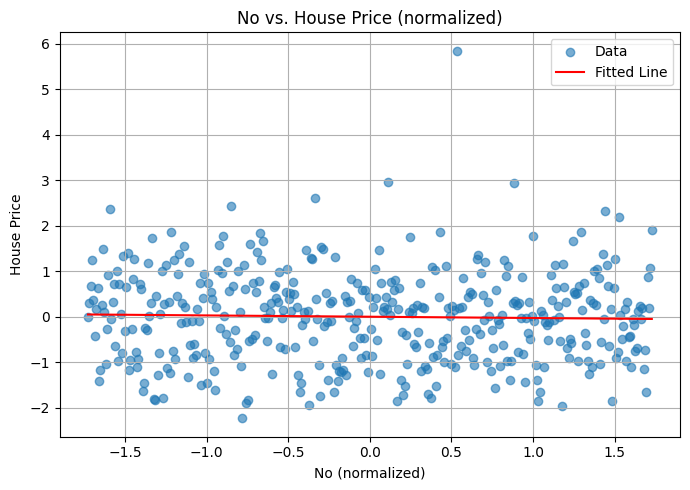

Feature: Transaction Date
Learned parameters: theta0 = -0.0000, theta1 = 0.0875
Final cost: 0.4962



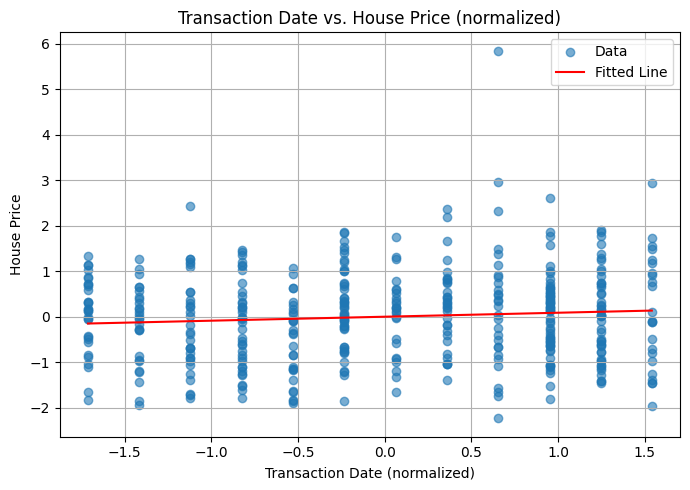

Feature: House Age
Learned parameters: theta0 = 0.0000, theta1 = -0.2106
Final cost: 0.4778



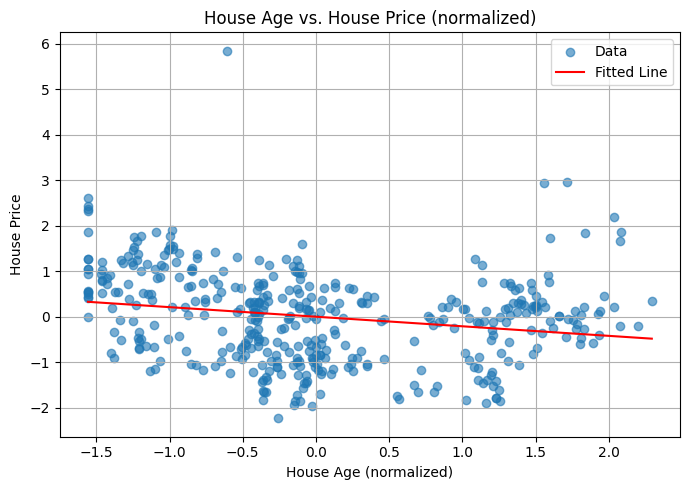

Feature: Distance to MRT Station
Learned parameters: theta0 = 0.0000, theta1 = -0.6736
Final cost: 0.2731



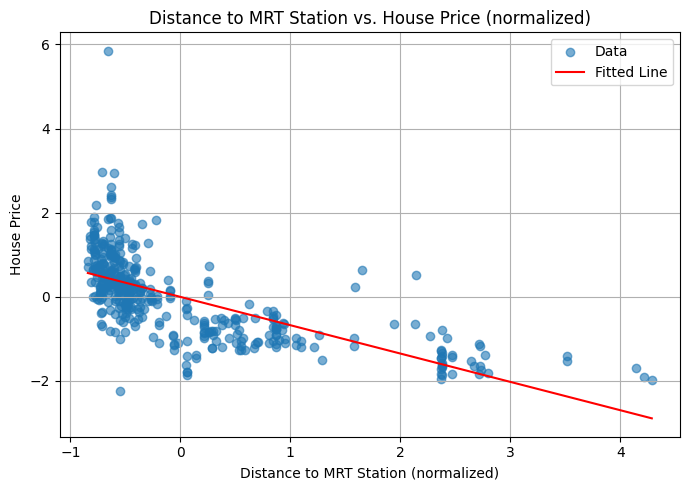

Feature: Number of Convenience Stores
Learned parameters: theta0 = 0.0000, theta1 = 0.5710
Final cost: 0.3370



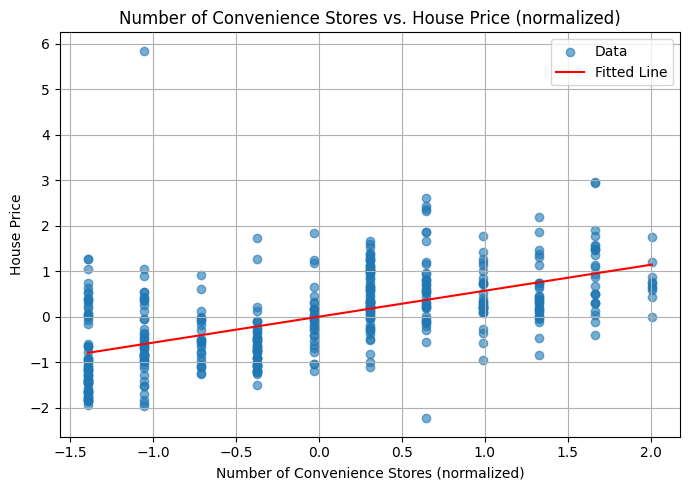

Feature: Latitude
Learned parameters: theta0 = -0.0000, theta1 = 0.5463
Final cost: 0.3508



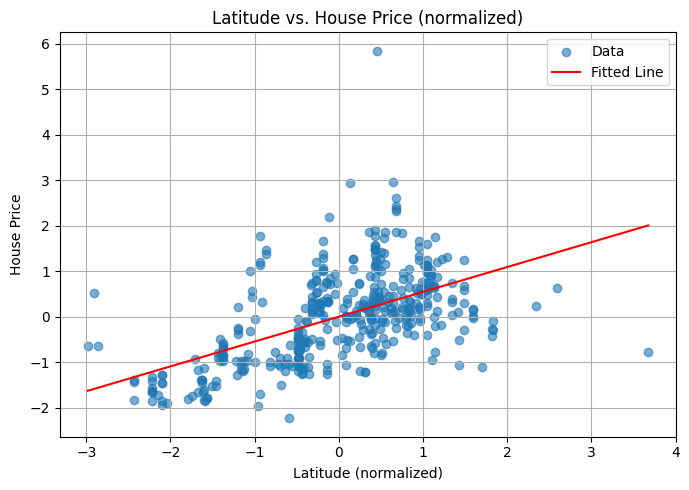

Feature: Longitude
Learned parameters: theta0 = 0.0000, theta1 = 0.5233
Final cost: 0.3631



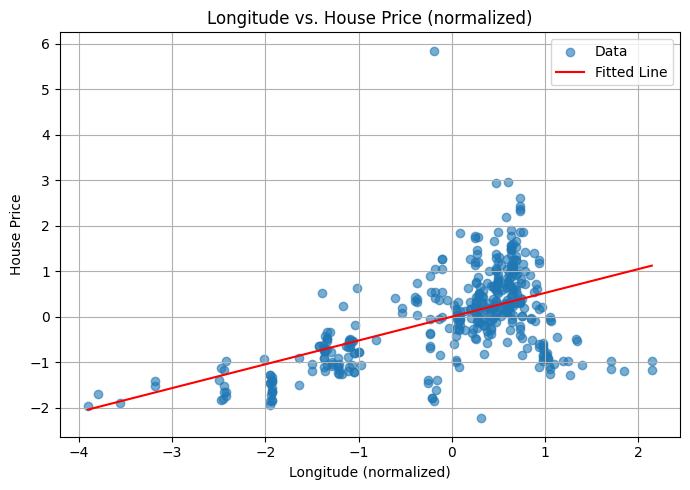

In [7]:
# Features and target
target = normalize(df_realestate['Y house price of unit area'].values)
features = list(df_realestate.columns[:-1])

feature_labels = {
    'X1 transaction date': 'Transaction Date',
    'X2 house age': 'House Age',
    'X3 distance to the nearest MRT station': 'Distance to MRT Station',
    'X4 number of convenience stores': 'Number of Convenience Stores',
    'X5 latitude': 'Latitude',
    'X6 longitude': 'Longitude'
}

alpha = 0.01 

# Plot for each feature
for feature in features:
    x = normalize(df_realestate[feature].values)
    theta = gradient_descent(x, target, alpha=alpha)
    final_cost = cost(theta, x, target)

    label = feature_labels.get(feature, feature)

    # Print in your preferred format
    print(f"Feature: {label}")
    print(f"Learned parameters: theta0 = {theta[0]:.4f}, theta1 = {theta[1]:.4f}")
    print(f"Final cost: {final_cost:.4f}\n")

    # Plot
    plt.figure(figsize=(7, 5))
    plt.scatter(x, target, label="Data", alpha=0.6)
    plt.plot(np.sort(x), hyp(theta, np.sort(x)), color="red", label="Fitted Line")
    plt.title(f'{label} vs. House Price (normalized)')
    plt.xlabel(f'{label} (normalized)')
    plt.ylabel("House Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
